In [39]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import UnivariateSpline
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy import stats

In [40]:
#arrays
tt=np.fromfile('t', sep=',')

#Promedios std-std-std glucosa
cfp1=np.fromfile('psssgCFP', sep=',')
rfp1=np.fromfile('psssgRFP', sep=',')
yfp1=np.fromfile('psssgYFP', sep=',')
od1=np.fromfile('psssgOD', sep=',')

#Promedio plux76-std-std glucosa
cfp2=np.fromfile('ppssgCFP', sep=',')
rfp2=np.fromfile('ppssgRFP', sep=',')
yfp2=np.fromfile('ppssgYFP', sep=',')
od2=np.fromfile('ppssgOD', sep=',')

#Promedio plux76-ptet-std glucosa
cfp3=np.fromfile('pptsgCFP', sep=',')
rfp3=np.fromfile('pptsgRFP', sep=',')
yfp3=np.fromfile('pptsgYFP', sep=',')
od3=np.fromfile('pptsgOD', sep=',')

#Promedio plux76-placI-std glucosa
cfp4=np.fromfile('pplsgCFP', sep=',')
rfp4=np.fromfile('pplsgRFP', sep=',')
yfp4=np.fromfile('pplsgYFP', sep=',')
od4=np.fromfile('pplsgOD', sep=',')

In [41]:
#Funciones para ajuste Gompertz
def F_sigma(t, A, um,l):
    return ((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-t))+1))))

def Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([0,0,0],[3,1,300])):
        Y_fit={}

        z,_=curve_fit(func,xdata[init:end], ydata[init:end],bounds=ParamBounds)

        print(z)

        evalF=func(xdata,z[0],z[1],z[2])

        plt.plot(xdata, ydata, '.',xdata, evalF, '-')

        plt.title('')

        plt.show()

        Y_fit=evalF,z

        return(Y_fit)

Min OD = 8.240000e-02
[  2.33932298e+00   9.81549169e-03   1.86507491e+02]


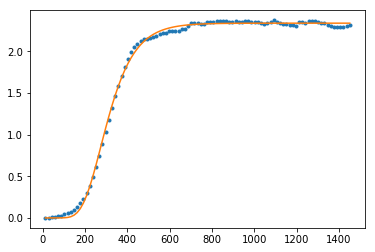

A=2.339323e+00
um=9.815492e-03
l=1.865075e+02
Tm=2.741841e+02
doubpe=7.061767e+01
ext=1.412353e+02
Tfinal=4.154194e+02


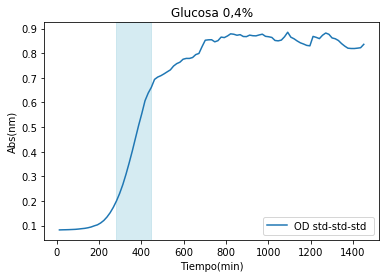

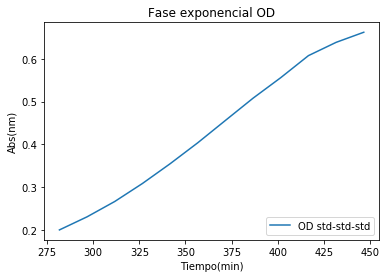

In [42]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#std-std-std
y = np.log(od1)-np.log(np.min(od1))
print('Min OD = %e'%((np.min(od1))))
evaly, params=Function_fit(tt,y,0,-1)
A1 = params[0]
um1=params[1]
l1=params[2]
print('A=%e'%(A1))
print('um=%e'%(um1))
print('l=%e'%(l1))

#Cálculo datos para determinar extensión de la fase exponencial
tm1=((A1/(np.exp(1)*um1))+l1)
print('Tm=%e'%(tm1))
t21=((np.log(2))/um1)
print('doubpe=%e'%(t21))
extdp1=2*t21
print('ext=%e'%extdp1)
ttot1=tm1+extdp1
print('Tfinal=%e'%ttot1)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[18]
y2=tt[29]
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od1,label='OD std-std-std ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[18:30],od1[18:30],label='OD std-std-std')
plt.legend(loc='lower right')

Min OD = 8.280000e-02
[  2.40847070e+00   9.55708597e-03   1.76557369e+02]


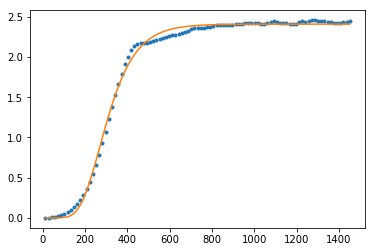

A=2.408471e+00
um=9.557086e-03
l=1.765574e+02
Tm=2.692663e+02
doubpe=7.252704e+01
ext=1.450541e+02
Tfinal=4.143203e+02


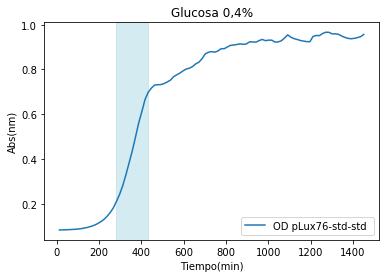

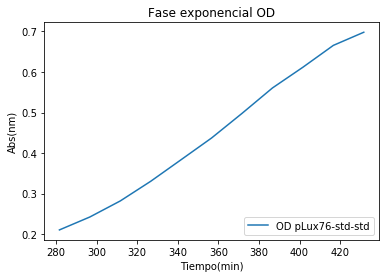

In [43]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#plux76-std-std
y = np.log(od2)-np.log(np.min(od2))
print('Min OD = %e'%((np.min(od2))))
evaly, params=Function_fit(tt,y,0,-1)
A2 = params[0]
um2=params[1]
l2=params[2]
print('A=%e'%(A2))
print('um=%e'%(um2))
print('l=%e'%(l2))

#Cálculo datos para determinar extensión de la fase exponencial
tm2=((A2/(np.exp(1)*um2))+l2)
print('Tm=%e'%(tm2))
t22=((np.log(2))/um2)
print('doubpe=%e'%(t22))
extdp2=2*t22
print('ext=%e'%extdp2)
ttot2=tm2+extdp2
print('Tfinal=%e'%ttot2)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[18]
y2=tt[28]
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od2,label='OD pLux76-std-std ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[18:29],od2[18:29],label='OD pLux76-std-std')
plt.legend(loc='lower right')

Min OD = 8.280000e-02
[  2.24075080e+00   9.58089970e-03   1.98256523e+02]


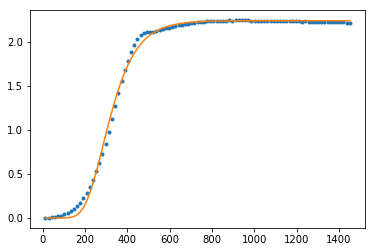

A=2.240751e+00
um=9.580900e-03
l=1.982565e+02
Tm=2.842950e+02
doubpe=7.234677e+01
ext=1.446935e+02
Tfinal=4.289886e+02


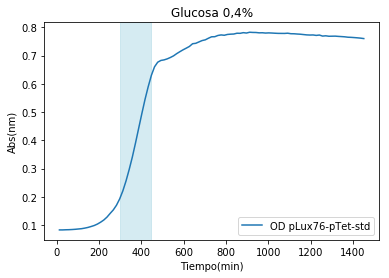

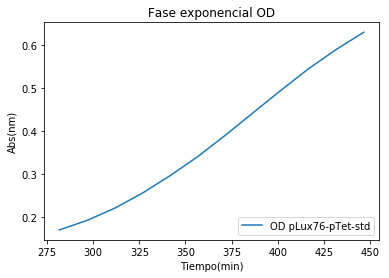

In [44]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#plux76-ptet-std
y = np.log(od3)-np.log(np.min(od3))
print('Min OD = %e'%((np.min(od3))))
evaly, params=Function_fit(tt,y,0,-1)
A3 = params[0]
um3=params[1]
l3=params[2]
print('A=%e'%(A3))
print('um=%e'%(um3))
print('l=%e'%(l3))

#Cálculo datos para determinar extensión de la fase exponencial
tm3=((A3/(np.exp(1)*um3))+l3)
print('Tm=%e'%(tm3))
t23=((np.log(2))/um3)
print('doubpe=%e'%(t23))
extdp3=2*t23
print('ext=%e'%extdp3)
ttot3=tm3+extdp3
print('Tfinal=%e'%ttot3)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[19]
y2=tt[29]
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od3,label='OD pLux76-pTet-std')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[18:30],od3[18:30],label='OD pLux76-pTet-std')
plt.legend(loc='lower right')

Min OD = 8.340000e-02
[  2.37254921e+00   1.05578438e-02   1.76137357e+02]


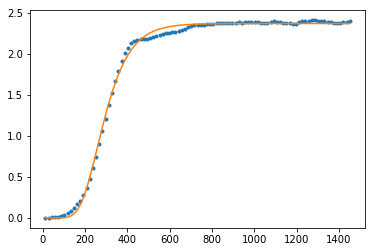

A=2.372549e+00
um=1.055784e-02
l=1.761374e+02
Tm=2.588069e+02
doubpe=6.565234e+01
ext=1.313047e+02
Tfinal=3.901116e+02


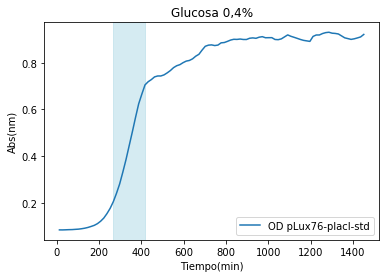

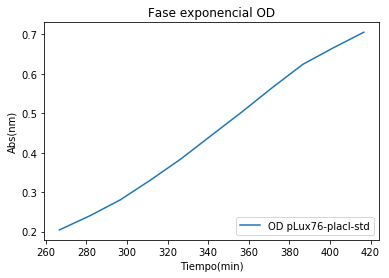

In [45]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#plux76-ptet-std
y = np.log(od4)-np.log(np.min(od4))
print('Min OD = %e'%((np.min(od4))))
evaly, params=Function_fit(tt,y,0,-1)
A4 = params[0]
um4=params[1]
l4=params[2]
print('A=%e'%(A4))
print('um=%e'%(um4))
print('l=%e'%(l4))

#Cálculo datos para determinar extensión de la fase exponencial
tm4=((A4/(np.exp(1)*um4))+l4)
print('Tm=%e'%(tm4))
t24=((np.log(2))/um4)
print('doubpe=%e'%(t24))
extdp4=2*t24
print('ext=%e'%extdp4)
ttot4=tm4+extdp4
print('Tfinal=%e'%ttot4)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[17]
y2=tt[27]
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od4,label='OD pLux76-placI-std')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[17:28],od4[17:28],label='OD pLux76-placI-std')
plt.legend(loc='lower right')

In [46]:
#std-std-std
o1=od1[18:30]
c1=cfp1[18:30]
r1=rfp1[18:30]
y1=yfp1[18:30]
t1=tt[18:30]

#plux76-std-std
o2=od2[18:29]
c2=cfp2[18:29]
r2=rfp2[18:29]
y2=yfp2[18:29]
t2=tt[18:29]

#plux76-ptet-std
o3=od3[19:30]
c3=cfp3[19:30]
r3=rfp3[19:30]
y3=yfp3[19:30]
t3=tt[19:30]

#plux76-placI-std
o4=od4[17:28]
c4=cfp4[17:28]
r4=rfp4[17:28]
y4=yfp4[17:28]
t4=tt[17:28]

In [47]:
#std-std-std
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,c1)
slopec1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,r1)
sloper1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,y1)
slopey1=slope
#plux76-std-std
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,c2)
slopec2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,r2)
sloper2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,y2)
slopey2=slope
#plux76-ptet-std
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,c3)
slopec3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,r3)
sloper3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,y3)
slopey3=slope
#plux76-placI-std
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,c4)
slopec4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,r4)
sloper4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,y4)
slopey4=slope

([<matplotlib.axis.XTick at 0x1321d76d898>,
 <a list of 4 Text xticklabel objects>)

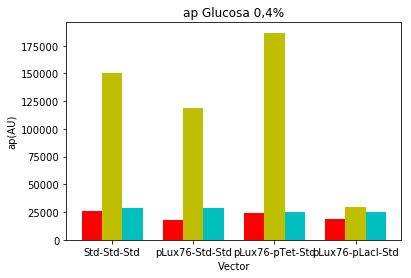

In [52]:
#Grafico de barras pendientes de FPs
pendientesc=[slopec1,slopec2,slopec3,slopec4]
pendientesr=[sloper1,sloper2,sloper3,sloper4]
pendientesy=[slopey1,slopey2,slopey3,slopey4]
X = np.arange(4)
plt.figure()
plt.title('ap Glucosa 0,4%')
plt.xlabel('Vector')
plt.ylabel('ap(AU)')
plt.bar(X[0]-0.25,pendientesr[0],color='r',width=0.25)
plt.bar(X[0]+0.00,pendientesy[0],color='y',width=0.25)
plt.bar(X[0]+0.25,pendientesc[0],color='c',width=0.25)
plt.bar(X[1]-0.25,pendientesr[1],color='r',width=0.25)
plt.bar(X[1]+0.00,pendientesy[1],color='y',width=0.25)
plt.bar(X[1]+0.25,pendientesc[1],color='c',width=0.25)
plt.bar(X[2]-0.25,pendientesr[2],color='r',width=0.25)
plt.bar(X[2]+0.00,pendientesy[2],color='y',width=0.25)
plt.bar(X[2]+0.25,pendientesc[2],color='c',width=0.25)
plt.bar(X[3]-0.25,pendientesr[3],color='r',width=0.25)
plt.bar(X[3]+0.00,pendientesy[3],color='y',width=0.25)
plt.bar(X[3]+0.25,pendientesc[3],color='c',width=0.25)
plt.xticks(X, ["Std-Std-Std","pLux76-Std-Std","pLux76-pTet-Std",'pLux76-pLacI-Std'])

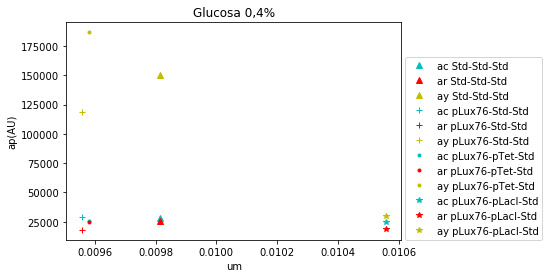

In [56]:
#grafico de ay versus Um
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(um1,slopec1,'c^',label='ac Std-Std-Std')
plt.plot(um1,sloper1,'r^',label='ar Std-Std-Std')
plt.plot(um1,slopey1,'y^',label='ay Std-Std-Std')
plt.plot(um2,slopec2,'c+',label='ac pLux76-Std-Std')
plt.plot(um2,sloper2,'r+',label='ar pLux76-Std-Std')
plt.plot(um2,slopey2,'y+',label='ay pLux76-Std-Std')
plt.plot(um3,slopec3,'c.',label='ac pLux76-pTet-Std')
plt.plot(um3,sloper3,'r.',label='ar pLux76-pTet-Std')
plt.plot(um3,slopey3,'y.',label='ay pLux76-pTet-Std')
plt.plot(um4,slopec4,'c*',label='ac pLux76-pLacI-Std')
plt.plot(um4,sloper4,'r*',label='ar pLux76-pLacI-Std')
plt.plot(um4,slopey4,'y*',label='ay pLux76-pLacI-Std')
plt.legend(loc=(1.01,0.0))

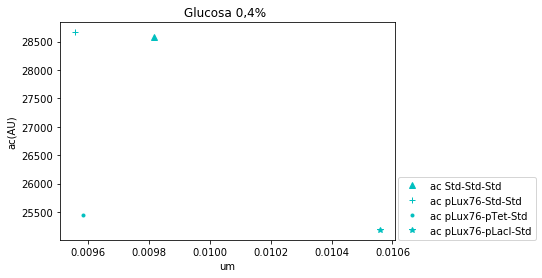

In [53]:
#grafico de ay versus Um
plt.figure()
plt.title('Glucosa 0,4% ')
plt.xlabel('um')
plt.ylabel('ac(AU)')
plt.plot(um1,slopec1,'c^',label='ac Std-Std-Std')
plt.plot(um2,slopec2,'c+',label='ac pLux76-Std-Std')
plt.plot(um3,slopec3,'c.',label='ac pLux76-pTet-Std')
plt.plot(um4,slopec4,'c*',label='ac pLux76-pLacI-Std')
plt.legend(loc=(1.01,0.0))

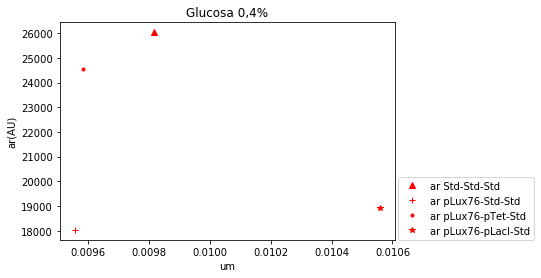

In [54]:
#grafico de ay versus Um
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ar(AU)')
plt.plot(um1,sloper1,'r^',label='ar Std-Std-Std')
plt.plot(um2,sloper2,'r+',label='ar pLux76-Std-Std')
plt.plot(um3,sloper3,'r.',label='ar pLux76-pTet-Std')
plt.plot(um4,sloper4,'r*',label='ar pLux76-pLacI-Std')
plt.legend(loc=(1.01,0.0))

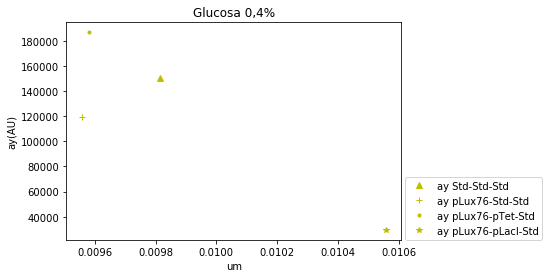

In [55]:
#grafico de ay versus Um
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ay(AU)')
plt.plot(um1,slopey1,'y^',label='ay Std-Std-Std')
plt.plot(um2,slopey2,'y+',label='ay pLux76-Std-Std')
plt.plot(um3,slopey3,'y.',label='ay pLux76-pTet-Std')
plt.plot(um4,slopey4,'y*',label='ay pLux76-pLacI-Std')
plt.legend(loc=(1.01,0.0))